In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ortho_group
import pandas as pd
from sklearn.decomposition import TruncatedSVD


rng = np.random.RandomState(8)

In [0]:
path = 'gdrive/My Drive/nips_papers_dataset_/NIPS_1987-2015.csv'
data = np.array(pd.read_csv(path, header=0, index_col=0))

In [0]:
d = 150
svd = TruncatedSVD(n_components=d, n_iter=20, random_state=rng)
original = svd.fit_transform(data).T
N = original.shape[1]

N =  11463
d =  150


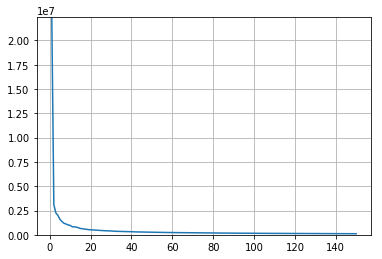

In [5]:
print 'N = ', N
print 'd = ', d

E_XX_T = np.dot(original, original.T)

U_star, Sig_star, VT_star = np.linalg.svd(E_XX_T)

x = np.arange(1, len(Sig_star)+1)
plt.plot(x, Sig_star)
plt.grid(which='both')
plt.ylim(-1, np.max(Sig_star)+1)
plt.show()

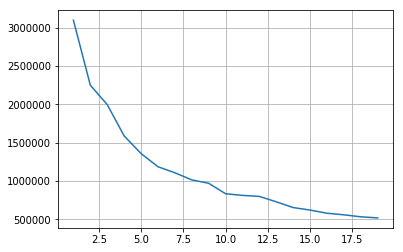

In [6]:
b = np.max(np.linalg.norm(original, axis=1, ord=2))
x = np.arange(1, 20)
plt.plot(x, Sig_star[1:20])
plt.grid(which='both')
#plt.ylim(-1, np.max(Sig_star)+1)
plt.show()


In [0]:
def weighted_cov_sum(original, n, m, N, d, rng, k, n_vects):
    #print 'calling weighted_cov_sum'
    UU_T = np.zeros((d,d))
    UU_T_weighted = np.zeros((d, d))
    UU_T_weighted_ = np.zeros((d, d))
    for i in range(m):
        inds = rng.choice(np.arange(N), n, replace=True)
        A_i = original[:, inds]
        X_i = np.dot(A_i, A_i.T)/n
        U_i, Sig_i, VT_i = np.linalg.svd(X_i)
        UU_T += np.dot(U_i[:, :k], U_i[:, :k].T)
        UU_T_weighted += np.dot(U_i[:, :k], np.dot(np.diag(Sig_i[:k]), U_i[:, :k].T))        
        UU_T_weighted_ += np.dot(U_i[:, :n_vects], np.dot(np.diag(Sig_i[:n_vects]), U_i[:, :n_vects].T))
    #print 'done with function'
    return UU_T/float(m),UU_T_weighted/float(m), UU_T_weighted_/float(m)

# of vectors:  15
n_list:  [  100   162   262   424   687  1111  1797  2909  4707  7618 12329 19953]

n =  100  done.
err =  2.1882561829686535 , std =  0.08118520590434505
err_weighted =  2.148324094553105 , std_weighted =  0.21804683963900204
err_weighted_ =  2.117280757285611 , std_weighted_ =  0.21723793405253747

n =  162  done.
err =  2.1433486136711237 , std =  0.08624760230006162
err_weighted =  1.9460363858947287 , std_weighted =  0.21708801387392493
err_weighted_ =  1.892122567772256 , std_weighted_ =  0.21702578493684105

n =  262  done.
err =  2.0565920723912754 , std =  0.10548164952043688
err_weighted =  1.7568971518325012 , std_weighted =  0.24840972389558416
err_weighted_ =  1.6703640970324023 , std_weighted_ =  0.25311638894044913

n =  424  done.
err =  1.9444154423329538 , std =  0.11046939007412089
err_weighted =  1.6110548280028376 , std_weighted =  0.22799326449894655
err_weighted_ =  1.495688133826859 , std_weighted_ =  0.242243470763613

n =  687  done.
err =  1

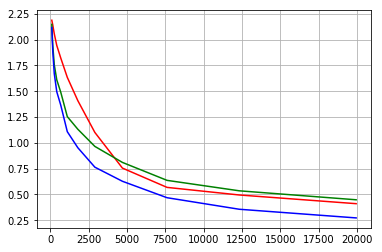

In [8]:
n_iter = 200
#n_list = np.arange(1, 1000, 50)
n_list = np.ceil(np.logspace(2, 4.3, 12)).astype(int)
# n_list = [50]
k = 5
c = 3
n_vects = int(np.minimum(N, c*k))
print '# of vectors: ', n_vects
print 'n_list: ', n_list
print

top_subspace = np.dot(U_star[:, 1:k+1], U_star[:, 1:k+1].T)

m = 50
errs = []
errs_weighted = []
errs_weighted_ = []
stds = []
stds_weighted = []
stds_weighted_ = []
for n in n_list:
    err = []
    err_weighted = []
    err_weighted_ = []
    for i in range(n_iter):
        UU_T, UU_T_weigthed, UU_T_weighted_ = weighted_cov_sum(original, n, m, N, d, rng, k, n_vects)
        U, _, _ = np.linalg.svd(UU_T)
        #print 'past SVD step'
        U_weighted, _, _ = np.linalg.svd(UU_T_weigthed)
        U_weighted_, _, _ = np.linalg.svd(UU_T_weighted_)
        err += [np.linalg.norm(top_subspace - np.dot(U[:, 1:k+1], U[:, 1:k+1].T), ord='fro')]
        err_weighted += [np.linalg.norm(top_subspace - np.dot(U_weighted[:, 1:k+1], U_weighted[:, 1:k+1].T), ord='fro')]
        err_weighted_ += [np.linalg.norm(top_subspace - np.dot(U_weighted_[:, 1:k+1], U_weighted_[:, 1:k+1].T), ord='fro')]
    errs += [np.mean(err)]
    errs_weighted += [np.mean(err_weighted)]
    errs_weighted_ += [np.mean(err_weighted_)]
    stds += [np.std(err)]
    stds_weighted += [np.std(err_weighted)]
    stds_weighted_ += [np.std(err_weighted_)]
    print 'n = ', n, ' done.'
    print 'err = ', np.mean(err), ', std = ', np.std(err)
    print 'err_weighted = ', np.mean(err_weighted), ', std_weighted = ', np.std(err_weighted)
    print 'err_weighted_ = ', np.mean(err_weighted_), ', std_weighted_ = ', np.std(err_weighted_)
    print

plt.plot(n_list, errs, c='r')
plt.plot(n_list, errs_weighted, c='g')
plt.plot(n_list, errs_weighted_, c='b')


plt.grid(which='both')
plt.show()